# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2025/)    
## 1MS041, 2025 
&copy;2025 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Markov Chains and Random Structures

**Markov chain**, named after [Andrey Markov](https://en.wikipedia.org/wiki/Andrey_Markov), is a mathematical model for a possibly dependent sequence of random variables. 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/AAMarkov.jpg/330px-AAMarkov.jpg)

Intuitively, a Markov Chain is a system which "jumps" among several states, with the next state depending (probabilistically) only on the current state. A useful heuristic is that of a frog jumping among several lily-pads, where the frog's memory is short enough that it doesn't remember what lily-pad it was last on, and so its next jump can only be influenced by where it is now.

Formally, the Markov property states that the conditional probability distribution for the system at the next step (and in fact at all future steps) given its current state depends only on the current state of the system, and not additionally on the state of the system at previous steps:

$$P(X_{n+1} \ | \, X_1,X_2,\dots,X_n) = P(X_{n+1}|X_n). \,$$
Since the system changes randomly, it is generally impossible to predict the exact state of the system in the future. However, the statistical and probailistic properties of the system's future can be predicted. In many applications it is these statistical properties that are important.

## Formal definition and terms

A Markov chain is a sequence of random variables $X_1, X_2, X_3, \ldots$ with the Markov property, namely that, given the present state, the future and past states are independent. Formally,

$$P(X_{n+1}=x \ | \ X_1=x_1, X_2=x_2 \ldots, X_n=x_n) = P(X_{n+1}=x|X_n=x_n).\,$$

The possible values of $X_i$ or the set of all states of the system form a countable set $\mathbb{X}$ called the state space of the chain.

The changes of state of the system are called transitions, and the probabilities associated with various state-changes are called transition probabilities.

Markov chains are often depicted by a weighted directed graph, where the edges are labeled by the probabilities of going from one state to the other states. This is called the flow diagram or transition probability diagram.  The transition probability matrix $\mathbf{P}$ encodes the probabilities associated with state-changes or "jumps" from one state to another in the state-space $\mathbb{X}$. If $\mathbb{X}$ is labelled by $\{0,1,2,\ldots\}$ then the $i,j$-th entry in the matrix $\mathbf{P}$ corresponds to the probability of going from state $i$ to state $j$ in one time-step.

$$\mathbf{P} = \begin{bmatrix} p_{0,0} & p_{0,1} & p_{0,2} & \ldots \\ p_{1,0} & p_{1,1} & p_{1,2} & \ldots \\ p_{2,0} & p_{2,1} & p_{2,2} & \ldots \\ \vdots & \vdots & \vdots & \ddots \end{bmatrix}$$

The state of the system at the $n$-th time step is described by a state probability vector $$\mathbf{p}^{(n)} = \left( \mathbf{p}^{(n)}_0, \mathbf{p}^{(n)}_1, \mathbf{p}^{(n)}_2,\ldots \right)$$ Thus, $\mathbf{p}^{(n)}_i$ is the probability you will find the Markov chain at state $i \in \mathbb{X}$ at time-step $n$ and $\mathbf{p}^{(0)}_i$ is called the initial probability vector at the convenient initial time $0$.

 

The state space $\mathbb{X}$ and transition probability matrix $\mathbf{P}$ completely characterizes a Markov chain.

### Example 1: Dry-Wet chain, a toy weather model 
#### A break-down of the [Wiki Example](https://en.wikipedia.org/wiki/Examples_of_Markov_chains#A_simple_weather_model)


In [2]:
from Utils import showURL
showURL('https://en.wikipedia.org/wiki/Examples_of_Markov_chains#A_simple_weather_model',400)

We can coarsely describe the weather of a given day by a toy model that states if it is "wet" or "dry". Each day the weather in our toy model is an element of our state space

$$\mathbb{X} = \{\text{"wet"}, \text{"dry"}\}.$$
We can make a picture of our toy probability model with a flow diagram or transition probability diagram as follows:

 

<img src="images/DryWet.png" width=400>

The probabilities of weather conditions, given the weather on the preceding day, can be represented by a transition probability matrix:

$$\mathbf{P} = \begin{bmatrix} 0.9 & 0.1\\ 0.5 & 0.5 \end{bmatrix}$$

The matrix $\mathbf{P}$ represents our toy weather model in which a dry day is 90% likely to be followed by another dry day, and a wet or rainy day is 50% likely to be followed by another wet day. The columns can be labelled "dry" and "wet" respectively, and the rows can be labelled in the same manner. For convenience, we will use integer labels $0$ and $1$ for "dry" and "wet", respectively.

$(\mathbf{P})_{i j}=p_{i,j}$ is the probability that, if a given day is of type $i$, it will be followed by a day of type $j$.

Since the transition probability matrix $\mathbf{P}$ is a stochastic matrix:

 

The rows of $\mathbf{P}$ sum to $1$.
The probabiltites in each row can be thought of as "current-state" specific $de~Moivre(p_{i,j}'s)$ distribution
Basically, you toss a current-state-specific many-faced weigted die to determine the next state
How can we think of our toy weather model in terms of two Bernouli trials; $Bernoulli(0.9)$ and $Bernoulli(0.5)$? 

Let's construct and assign the matrix to `P`. 

In [3]:
import numpy as np
P = np.matrix([[9/10,1/10],[1/2,1/2]])
P               # display P

matrix([[0.9, 0.1],
        [0.5, 0.5]])

In [4]:
P[0,1]   # recall accessing (i,j)-th entry of matrix P

0.1

### Predicting the weather with our Dry-Wet chain

The weather on day 0 is known to be dry. This is represented by a probability vector in which the "dry" entry is 100%, and the "wet" entry is 0%:

$$ \mathbf{p}^{(0)} = \begin{bmatrix} 1 & 0 \end{bmatrix} $$
The weather on day 1 can be predicted by:

$$ \mathbf{p}^{(1)} = \mathbf{p}^{(0)} \ \mathbf{P} = \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} 0.9 & 0.1 \\ 0.5 & 0.5 \end{bmatrix} = \begin{bmatrix} 0.9 & 0.1 \end{bmatrix} $$

Thus, there is an 90% chance that day 1 will also be sunny.

In [5]:
p0 = np.matrix((1,0))    # initial probability vector for a dry day zero
p0

matrix([[1, 0]])

In [6]:
p1 = p0*P                  # left multiply the matrix by the state prob vector
p1

matrix([[0.9, 0.1]])

The weather on day 2 can be predicted in the same way:

$$\mathbf{p}^{(2)} =\mathbf{p}^{(1)} \ \mathbf{P} = \mathbf{p}^{(0)} \ \mathbf{P}^2 = \begin{bmatrix} 1 & 0 \end{bmatrix} \ \begin{bmatrix} 0.9 & 0.1 \\ 0.5 & 0.5 \end{bmatrix}^2 = \begin{bmatrix} 0.86 & 0.14 \end{bmatrix}$$
or, equivalently,

$$ \mathbf{p}^{(2)} =\mathbf{p}^{(1)} \ \mathbf{P} = \begin{bmatrix} 0.9 & 0.1 \end{bmatrix} \ \begin{bmatrix} 0.9 & 0.1 \\ 0.5 & 0.5 \end{bmatrix} = \begin{bmatrix} 0.86 & 0.14 \end{bmatrix} $$
How do we do this in Python?

In [7]:
p2 = p0*P**2       # left multiply the initial probability vector by square of P
p2                # disclose the probability vector at time-step 2

matrix([[0.86, 0.14]])

or, equivalently,

In [8]:
p2 = p1*P  # left multiply the probability vector at time-step 1 by P

# disclose the probability vector at time-step 2 (compare output of previous cell)
p2

matrix([[0.86, 0.14]])

General rules for day $n$ follow from mathematical induction as follows:

$$ \mathbf{p}^{(n)} = \mathbf{p}^{(n-1)} \ \mathbf{P} $$
$$ \mathbf{p}^{(n)} = \mathbf{p}^{(0)} \ \mathbf{P}^n $$
How do we operate with a matrix in numpy to do this for any given $n$?

In [9]:
n = 3                     # assign some specific time-step or day
dry_p0 = np.matrix((1,0))    # initial probability vector for a dry day zero
pn = dry_p0 * P**n         # probability vector for day n
pn                        # display it

matrix([[0.844, 0.156]])

In [10]:
n = 5                     # assign some specific time-step or day
wet_p0 = np.matrix((0,1))    # initial probability vector for a wet day zero
pn = wet_p0 * P**n         # probability vector for day n
pn                        # display it

matrix([[0.8248, 0.1752]])

Let's get the state probability vector at time n = 0,1,...,nmax

In [22]:
nmax = 5             # maximum number of days or time-steps of interest
[(n, np.matrix((1,0)) * P**n ) for n in range(nmax+1)] 

[(0, matrix([[1., 0.]])),
 (1, matrix([[0.9, 0.1]])),
 (2, matrix([[0.86, 0.14]])),
 (3, matrix([[0.844, 0.156]])),
 (4, matrix([[0.8376, 0.1624]])),
 (5, matrix([[0.83504, 0.16496]]))]

In the next interact let's visualize the $n$-step state probability vector $\mathbf{p}^{(n)}=(\mathbf{p}^{(n)}_0,\mathbf{p}^{(n)}_1)$, $n=0,1,\ldots, {\tt nmax}$ steps


See what's going on here...? 

Try to increase `nmax` and see where the state prob vector is going geometrically.

In [20]:
nmax= 10
[np.matrix((1,0)) * P**n  for n in range(nmax)]

[matrix([[1., 0.]]),
 matrix([[0.9, 0.1]]),
 matrix([[0.86, 0.14]]),
 matrix([[0.844, 0.156]]),
 matrix([[0.8376, 0.1624]]),
 matrix([[0.83504, 0.16496]]),
 matrix([[0.834016, 0.165984]]),
 matrix([[0.8336064, 0.1663936]]),
 matrix([[0.83344256, 0.16655744]]),
 matrix([[0.83337702, 0.16662298]])]

In [13]:
from ipywidgets import interact, IntSlider
@interact
def nStepProbVec(nmax=IntSlider(1,1,50,1)):
    import matplotlib.pyplot as plt
    dry_p0 = np.stack([np.matrix((0.2,0.8)) * P**n  for n in range(nmax)],axis=0)
    plt.scatter(np.array(dry_p0[:,0]),np.array(dry_p0[:,1]),color='red',alpha=0.5)
    
    wet_p0 = np.stack([np.matrix((.6,0.4)) * P**n  for n in range(nmax)],axis=0)
    plt.scatter(np.array(wet_p0[:,0]),np.array(wet_p0[:,1]),alpha=0.5)
    plt.xlabel('dry')
    plt.ylabel('wet')
    plt.xlim(0,1)
    plt.ylim(0,1)

interactive(children=(IntSlider(value=1, description='nmax', max=50, min=1), Output()), _dom_classes=('widget-…

In [14]:
evals, evecs = np.linalg.eig(P.T)
evecs[:,0]/np.sum(evecs[:,0])

matrix([[0.83333333],
        [0.16666667]])

In [15]:
evals

array([1. , 0.4])

### Steady state of the weather in our Dry-Wet chain

In this example, predictions for the weather on more distant days are increasingly inaccurate and tend towards a steady state vector. This vector represents the probabilities of dry and wet weather on all days, and is independent of the initial weather.

The steady state vector is defined as:

$$\mathbf{s} = \lim_{n \to \infty} \mathbf{p}^{(n)}$$

but only converges to a strictly positive vector if $\mathbf{P}$ is a regular transition matrix (that is, there is at least one $\mathbf{P}^n$ with all non-zero entries making the Markov chain irreducible and aperiodic).

Since the $\mathbf{s}$ is independent from initial conditions, it must be unchanged when transformed by $\mathbf{P}$. This makes it an eigenvector (with eigenvalue $1$), and means it can be derived from $\mathbf{P}$. For our toy model of weather:

 

$$
\begin{matrix} 
    \mathbf{P} & = & 
    \begin{bmatrix} 
        0.9 & 0.1 
        \\ 
        0.5 & 0.5 
    \end{bmatrix} 
    \\ 
    %\mathbf{s} \ \mathbf{P} & = & \mathbf{s} & \mbox{(} \mathbf{s} \mbox{ is unchanged by } \mathbf{P} \mbox{.)} 
    \mathbf{s} \ \mathbf{P} & = & \mathbf{s} & ( \mathbf{s} \text{ is unchanged by } \mathbf{P} .) 
    \\ 
    & = & \mathbf{s} \ \mathbf{I} 
    \\ 
    \mathbf{s} \ (\mathbf{P} - \mathbf{I}) & = & \mathbf{0} 
    \\ 
    & = & \mathbf{s} \bigg ( 
    \begin{bmatrix} 
        0.9 & 0.1 
        \\ 0.5 & 0.5 
    \end{bmatrix} 
    - 
    \begin{bmatrix} 
        1 & 0 
        \\ 0 & 1 
    \end{bmatrix} 
    \bigg ) 
    \\ & = & \mathbf{s} 
    \begin{bmatrix} 
        -0.1 & 0.1 
        \\ 0.5 & -0.5 
    \end{bmatrix} 
\end{matrix}
$$ 
$$
    \begin{bmatrix} 
    \mathbf{s}_0 & \mathbf{s}_1 
    \end{bmatrix} 
    \begin{bmatrix} 
    -0.1 & 0.1 
    \\ 0.5 & -0.5 
    \end{bmatrix} 
    = 
    \begin{bmatrix} 
    0 & 0 
    \end{bmatrix}
$$
 


So $- 0.1 \mathbf{s}_0 + 0.5 \mathbf{s}_1 = 0$ and since they are a probability vector we know that $\mathbf{s}_0 + \mathbf{s}_1 = 1$.

Solving this pair of simultaneous equations gives the steady state distribution:

 

$$\left( \mathbf{s}_0 , \mathbf{s}_1 \right) = \left( 5/6 , 1/6 \right) = \left( 0.833 , 0.167 \right)$$
 

In conclusion, in the long term, 83% of days are dry.

How do we operate the above to solve for $\mathbf{s}$ in Python? There are two "methods". We can either use

- Method 1: solve a system of linear equations with `sympy` to get $\mathbf{s}$ or
- Method 2: obtain $\mathbf{s}$ via eigen decomposition.


### Method 1: You Try

### Method 2: 
Alternatively use eigen decomposition to solve for $\mathbb{s}$. 

#### If your linear algebra is rusty
To follow Method 2 you need to know a bit more about [eigen values, eigen vectors and eigen spaces](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors).

Learn from Khan academy more slowly:
-[https://www.khanacademy.org/math/linear-algebra/alternate-bases/eigen-everything/v/linear-algebra-introduction-to-eigenvalues-and-eigenvectors](https://www.khanacademy.org/math/linear-algebra/alternate-bases/eigen-everything/v/linear-algebra-introduction-to-eigenvalues-and-eigenvectors)

Also, ensure you really understand the visual interactive exploration of low-dimensional eigen values and eigen vectors here:

-[https://setosa.io/ev/eigenvectors-and-eigenvalues/](https://setosa.io/ev/eigenvectors-and-eigenvalues/).

Using numpy linalg to compute the eigenvalues and eigenvectors. It returns a tuple, the first is the array of the eigenvalues and the second is a matrix of eigenvectors. From the above, we see that the one we are after is the eigenvector corresponding to the eigenvalue $1$.

In [16]:
evals,evecs = np.linalg.eig(P.T)
evals,evecs

(array([1. , 0.4]),
 matrix([[ 0.98058068, -0.70710678],
         [ 0.19611614,  0.70710678]]))

The eigenvectors are columns of the `evecs` matrix, and it is the first we are interested in. This will have norm $1$, but we need to make sure that the sum is $1$, so that it is a probability mass function. See

In [17]:
first_evec = evecs[:,0]
np.array(first_evec) / np.sum(first_evec)

array([[0.83333333],
       [0.16666667]])

## Working with real data

In [26]:
import numpy as np
chcRainfallData = np.genfromtxt('D:/Uppsala Materials/data/rainfallInChristchurch.csv', delimiter=",")
## Yeah, this is a much easier way to read a csv file into numpy array! 
## But this data was preformatted with no errors during type conversion

In [27]:
len(chcRainfallData)

25044

In [28]:
chcRainfallData[0:10] 

array([[19430802.,        0.],
       [19430803.,        0.],
       [19430804.,        0.],
       [19430805.,        0.],
       [19430806.,        0.],
       [19430807.,        0.],
       [19430808.,        0.],
       [19430809.,        0.],
       [19430810.,        0.],
       [19430811.,        0.]])

In [29]:
chcRainfallData[-1] # the data goes from 1943 August 02 to 2012 May 06

array([20120506.,        0.])

In [ ]:
from ipywidgets import interact, IntSlider
@interact
def chch_precipitation(start_date = IntSlider(0,0,len(chcRainfallData)-100,1), end_date = IntSlider(0,10,len(chcRainfallData)-1,1)):
    sel_data = chcRainfallData[start_date:end_date]
    sel_daysdata = np.array([[i,sel_data[i][1]] for i in range(len(sel_data))])
    import matplotlib.pyplot as plt
    plt.scatter(sel_daysdata[:,0],sel_daysdata[:,1])
    plt.xlabel('days')
    plt.ylabel('mm')

interactive(children=(IntSlider(value=0, description='start_date', max=24944), IntSlider(value=10, description…

In [31]:
all_daysdata = (chcRainfallData[:,1] > 0)*1

In [32]:
all_daysdata[200:210]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [33]:
np.mean(all_daysdata)

0.3439945695575787

Interactive cell to allow you to select some specific data and turn it into the list of 0 or 1 tuples (this list will then be available in `sel_daysdata` in later cells in the worksheet).

#### Daily Precipitation at Christchurch, fed from NIWA data (NZ's equivalent of US's NOAA)

In [34]:
@interact
def chch_wetdry(start_date = IntSlider(0,0,len(chcRainfallData)-100,1), end_date = IntSlider(0,10,len(chcRainfallData)-1,1)):
    #global all_daysdata  # made it a global so it is easy to choose data
    sel_data = all_daysdata[start_date:end_date]
    import matplotlib.pyplot as plt
    plt.scatter(range(end_date-start_date),sel_data)
    plt.xlabel('days')
    plt.ylabel('Dry/Wet')

interactive(children=(IntSlider(value=0, description='start_date', max=24944), IntSlider(value=10, description…

### Maximum likelihood estimation of the unknown transition probabilities 
#### for the Dry-Wet Markov chain model of Christchurch weather

In the example we have been working with earlier, the transition probabilities were given by the matrix $$\mathbf{P}=\begin{bmatrix} 0.9 & 0.1\\0.5&0.5\end{bmatrix}$$ and we simply used the given $\mathbf{P}$ to understand the properties and utilities of the probability model for a possibly dependent sequence of $\{0,1\}$-valued random variables encoding the $\{\text{Dry},\text{Wet}\}$ days, respectively.

What we want to do now is use the data from Christchurch's Aeroclub obtained from NIWA to estimate Christchurch's unknown transition probability matrix $$\mathbf{P}= \begin{bmatrix} p_{0,0} & p_{0,1}\\ p_{1,0} & p_{1,1} \end{bmatrix}.$$ 

Minimizing the empirical log loss we get

$$\widehat{p}_{0,0} = \frac{n_{0,0}}{n_{0,0}+n_{0,1}} \quad \text{and} \quad \widehat{p}_{1,1} = \frac{n_{1,1}}{n_{1,0}+n_{1,1}}
$$ 

In [35]:
from Utils import makeFreq

In [36]:
transitions_data = np.stack([all_daysdata[:-1],all_daysdata[1:]])

In [37]:
transitions_data[:,200:210]

array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 1]])

In [38]:
transition_counts = makeFreq(transitions_data)
transition_counts

array([[    0,     0, 12334],
       [    0,     1,  4094],
       [    1,     0,  4094],
       [    1,     1,  4521]], dtype=int64)

In [39]:
n_00 = transition_counts[0,-1]
n_01 = transition_counts[1,-1]
n_10 = transition_counts[2,-1]
n_11 = transition_counts[3,-1]
n_00, n_01, n_10, n_11

(12334, 4094, 4094, 4521)

Make a function to make a transition counts matrix from any list of 0/1 tuples passed in. 

Make a function to turn transitions counts into a matrix of values for:

$$\widehat{\mathbf{P}}=\begin{bmatrix} \hat{p}_{0,0} & \hat{p}_{0,1}\\ \hat{p}_{1,0} & \hat{p}_{1,1}\end{bmatrix}.$$

In [40]:
def estimateMatrix(n_00,n_01,n_10,n_11):
    p00 = n_00/(n_00+n_01)
    p11 = n_11/(n_11+n_10)
    p10 = 1-p11
    p01 = 1-p00
    return np.matrix([[p00,p01],[p10,p11]])

Look at this for all the data:

In [41]:
estimateMatrix(n_00,n_01,n_10,n_11)

matrix([[0.75079133, 0.24920867],
        [0.47521764, 0.52478236]])

In [42]:
evals,evecs = np.linalg.eig(estimateMatrix(n_00,n_01,n_10,n_11).T)
# During the lecture I forgot to transpose the transition matrix above
# which I should have due to the computation I did on the board

In [43]:
evals,evecs

(array([1.        , 0.27557369]),
 matrix([[ 0.88561302, -0.70710678],
         [ 0.46442392,  0.70710678]]))

In [44]:
evecs[:,0]/np.sum(evecs[:,0])

matrix([[0.65599169],
        [0.34400831]])

### YouTry

Consider the Markov chain describing the mode of transport used by a lazy professor. He has only two modes of transport, namely Walk or Drive. Label Walk by $0$ and Drive by $1$. If he walks today then he will definitely drive tomorrow. But, if he drives today then he flips a fair coin to decide whether he will Walk or Drive tomorrow. His decision to get to work is the same on each day. In the cells below try to:

- Find the flow diagram
- Find and assign the transition probability matrix for this Markov chain
- Find the probability that he will drive on the $n$-th day given he will walk today (day $0$)
- What is the steady state probability vector for this chain?

**Also do by hand!**

<br\> <br \> <br\> <br \>

## More examples of Markov chains and what you can do

In [ ]:
# Some plotting utilities for Markov chains
import networkx as nx
import matplotlib.pyplot as plt
def plot_markov_chain(states, P, figsize=(6,6), layout='circular', node_size=800, title='Markov Chain'):
    """
    Plot a directed Markov chain given a list of state names and a transition matrix P.
    """
    G = nx.DiGraph()
    G.add_nodes_from(states)
    for i, u in enumerate(states):
        for j, v in enumerate(states):
            prob = float(P[i, j])
            if prob > 0:
                G.add_edge(u, v, weight=prob)

    pos = nx.circular_layout(G) if layout == 'circular' else nx.spring_layout(G)
    print(G)
    plt.figure(figsize=figsize)
    nx.draw_networkx_nodes(G, pos, node_size=node_size)
    nx.draw_networkx_labels(G, pos, font_size=10)
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=12,
                           connectionstyle='arc3,rad=0.1', node_size=node_size)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                                 connectionstyle='arc3,rad=0.1', font_size=8)
    plt.axis('off')
    plt.title(title)
    plt.show()

def is_stochastic_matrix(P):
    """
    Check if a matrix P is a stochastic matrix (rows sum to 1).
    """
    row_sums = P.sum(axis=1)
    return np.allclose(row_sums, 1)

In [ ]:
%%sh
head -n 5 data/rainfallInChristchurch.csv

19430802.0,0.0
19430803.0,0.0
19430804.0,0.0
19430805.0,0.0
19430806.0,0.0


In [ ]:
import pandas as pd
df = pd.read_csv("data/rainfallInChristchurch.csv",header=None,names=['date','rain'])
rain = df['rain'].to_numpy()
wet_or_dry = (rain > 0)*1
wet_or_dry
#df

array([0, 0, 0, ..., 0, 0, 0], shape=(25044,))

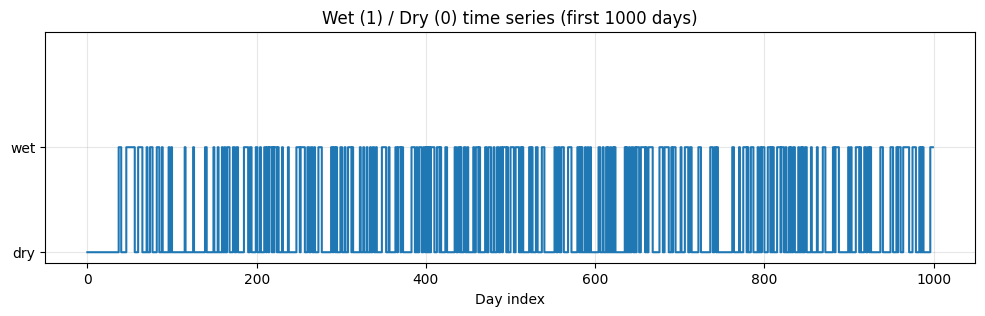

In [ ]:
# plot first 1000 days of wet/dry time series
n_days = min(1000, len(wet_or_dry))

plt.figure(figsize=(12,3))
plt.step(range(n_days), wet_or_dry[:n_days], where='post')




plt.ylim(-0.1, 2.1)
plt.yticks([0, 1], ['dry', 'wet'])
plt.xlabel('Day index')
plt.title(f'Wet (1) / Dry (0) time series (first {n_days} days)')
plt.grid(alpha=0.3)
plt.show()


### How would a coin flip look like

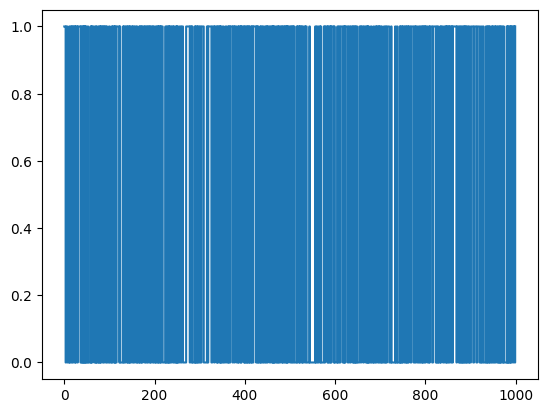

In [ ]:
import numpy as np
X = np.random.randint(0, 2, size=1000)
plt.step(range(1000), X, where='post')

In [ ]:
wet_or_dry

array([0, 0, 0, ..., 0, 0, 0], shape=(25044,))

In [ ]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x[1:]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x[:-1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
import numpy as np
# estimate transition counts and matrix
n00 = int(np.sum((wet_or_dry[:-1] == 0) & (wet_or_dry[1:] == 0)))
n01 = int(np.sum((wet_or_dry[:-1] == 0) & (wet_or_dry[1:] == 1)))
n10 = int(np.sum((wet_or_dry[:-1] == 1) & (wet_or_dry[1:] == 0)))
n11 = int(np.sum((wet_or_dry[:-1] == 1) & (wet_or_dry[1:] == 1)))

In [ ]:
print(f"n00: {n00}, n01: {n01}, n10: {n10}, n11: {n11}")

n00: 12334, n01: 4094, n10: 4094, n11: 4521


In [ ]:
P_est = np.matrix([[n00/(n00+n01),n01/(n00+n01)],
                   [n10/(n10+n11),n11/(n10+n11)]])
#plot_markov_chain(["Wet","dry"],P_est,layout="circular")
P_est

matrix([[0.75079133, 0.24920867],
        [0.47521764, 0.52478236]])

Let's construct and assign the matrix to `P`. 

In [ ]:
# 5-state Markov chain
states = [f'S{i}' for i in range(5)]
P = np.matrix([
    [0.6,  0.2,  0.1,  0.05, 0.05],
    [0.1,  0.5,  0.2,  0.1,  0.1 ],
    [0.1,  0.1,  0.6,  0.1,  0.1 ],
    [0.05, 0.2,  0.15, 0.5,  0.1 ],
    [0.1,  0.1,  0.1,  0.2,  0.5 ],
])
P  # display P

matrix([[0.6 , 0.2 , 0.1 , 0.05, 0.05],
        [0.1 , 0.5 , 0.2 , 0.1 , 0.1 ],
        [0.1 , 0.1 , 0.6 , 0.1 , 0.1 ],
        [0.05, 0.2 , 0.15, 0.5 , 0.1 ],
        [0.1 , 0.1 , 0.1 , 0.2 , 0.5 ]])

DiGraph with 5 nodes and 25 edges


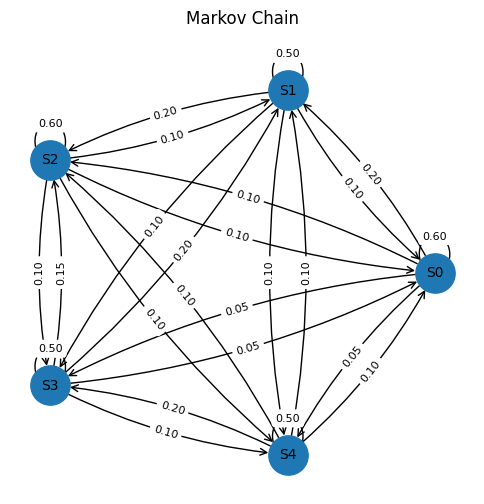

In [ ]:
plot_markov_chain(states, P)

In [ ]:
p0 = np.matrix([[1, 0, 0, 0, 0]])  # initial distribution

In [ ]:
p0*P

matrix([[0.6 , 0.2 , 0.1 , 0.05, 0.05]])

In [ ]:
p0*(P**2)

matrix([[0.3975, 0.245 , 0.1725, 0.095 , 0.09  ]])

In [ ]:
p0*(P**10)

matrix([[0.1836013 , 0.22689218, 0.26260606, 0.17590752, 0.15099294]])

In [ ]:
p0*(P**11)

matrix([[0.18300527, 0.22670775, 0.26278762, 0.17628224, 0.15121711]])

In [ ]:
from ipywidgets import interact, IntSlider

@interact(start_state=IntSlider(0,0,len(states)-1,1), nmax=IntSlider(1,1,50,1))
def nStepProbVec(start_state=0, nmax=10):
    """
    Plot the evolution of a 5-state probability vector p_n = p0 * P^n
    for n = 0..nmax. Choose the starting state index with start_state.
    """
    import matplotlib.pyplot as plt

    # ensure we work with arrays (P may be a numpy.matrix)
    P_arr = np.asarray(P)
    n_states = P_arr.shape[0]

    # initial distribution: pure state at start_state
    p0 = np.zeros(n_states)
    p0[start_state] = 1.0

    # compute sequence p_n
    seq = [p0 @ np.linalg.matrix_power(P_arr, n) for n in range(nmax + 1)]
    arr = np.vstack(seq)  # shape (nmax+1, n_states)

    # plot each state's probability over n
    plt.figure(figsize=(8,4.5))
    for k in range(n_states):
        plt.plot(range(nmax + 1), arr[:, k], marker='o', label=states[k])
    plt.xlabel('n (step)')
    plt.ylabel('Probability')
    plt.ylim(0, 1)
    plt.xlim(0, nmax)
    plt.legend(loc='best')
    plt.grid(alpha=0.3)
    plt.show()

interactive(children=(IntSlider(value=0, description='start_state', max=4), IntSlider(value=1, description='nm…

In [ ]:
import math
from functools import reduce

# Example 5-state transition matrix with periodic states
# States 0 and 1 form a 2-cycle (period 2).
P_periodic = np.array([
    [0.0, 1.0, 0.0, 0.0, 0.0],  # 0 -> 1
    [1.0, 0.0, 0.0, 0.0, 0.0],  # 1 -> 0
    [0.0, 0.0, 0.0, 0.9, 0.1],
    [0.0, 0.0, 0.1, 0.0, 0.9],
    [0.0, 0.0, 1.0, 0.0, 0.0],
])


DiGraph with 5 nodes and 7 edges


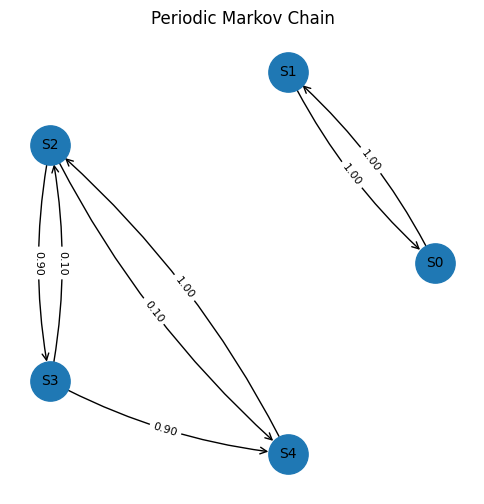

In [ ]:
plot_markov_chain(states, P_periodic, title='Periodic Markov Chain')

In [ ]:
from ipywidgets import interact, IntSlider

@interact(start_state=IntSlider(0,0,len(states)-1,1), nmax=IntSlider(1,1,50,1))
def nStepProbVec(start_state=0, nmax=10):
    """
    Plot the evolution of a 5-state probability vector p_n = p0 * P^n
    for n = 0..nmax. Choose the starting state index with start_state.
    """
    import matplotlib.pyplot as plt

    # ensure we work with arrays (P may be a numpy.matrix)
    P_arr = np.asarray(P_periodic)
    n_states = P_arr.shape[0]

    # initial distribution: pure state at start_state
    p0 = np.zeros(n_states)
    p0[start_state] = 1.0

    # compute sequence p_n
    seq = [p0 @ np.linalg.matrix_power(P_arr, n) for n in range(nmax + 1)]
    arr = np.vstack(seq)  # shape (nmax+1, n_states)

    # plot each state's probability over n
    plt.figure(figsize=(8,4.5))
    for k in range(n_states):
        plt.plot(range(nmax + 1), arr[:, k], marker='o', label=states[k])
    plt.xlabel('n (step)')
    plt.ylabel('Probability')
    plt.ylim(0, 1)
    plt.xlim(0, nmax)
    plt.legend(loc='best')
    plt.grid(alpha=0.3)
    plt.show()

interactive(children=(IntSlider(value=0, description='start_state', max=4), IntSlider(value=1, description='nm…

In [ ]:

def state_period(P, state, max_n=30, tol=1e-12):
    """
    Compute period of `state` by finding gcd of n such that (P^n)[state,state] > tol.
    """
    P_arr = np.asarray(P, dtype=float)
    n_states = P_arr.shape[0]
    M = np.eye(n_states)
    hit_ns = []
    for n in range(1, max_n + 1):
        M = M @ P_arr
        if M[state, state] > tol:
            hit_ns.append(n)
    if not hit_ns:
        return 0  # no return observed within max_n
    return reduce(math.gcd, hit_ns)

# display matrix and compute periods
print("P_periodic:")
print(P_periodic)
periods = [state_period(P_periodic, i) for i in range(P_periodic.shape[0])]
print("State periods:", periods)  # expected [2,2,3,3,3]

P_periodic:
[[0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.9 0.1]
 [0.  0.  0.1 0.  0.9]
 [0.  0.  1.  0.  0. ]]
State periods: [2, 2, 1, 1, 1]


In [ ]:
evals,evecs = np.linalg.eig(P.T)
evals,evecs

(array([1.        +0.j        , 0.53294835+0.j        ,
        0.38352582+0.04011273j, 0.38352582-0.04011273j,
        0.4       +0.j        ]),
 matrix([[ 3.99898737e-01+0.j        , -7.69111564e-01+0.j        ,
           5.60908290e-02-0.07755695j,  5.60908290e-02+0.07755695j,
           9.68626241e-16+0.j        ],
         [ 4.96797277e-01+0.j        , -1.97288912e-01+0.j        ,
          -7.55928946e-01+0.j        , -7.55928946e-01-0.j        ,
           7.07106781e-01+0.j        ],
         [ 5.76777024e-01+0.j        ,  1.70329266e-01+0.j        ,
           5.24104658e-01+0.2773714j ,  5.24104658e-01-0.2773714j ,
          -7.07106781e-01+0.j        ],
         [ 3.87594160e-01+0.j        ,  5.06819203e-01+0.j        ,
           6.84422440e-02-0.22566677j,  6.84422440e-02+0.22566677j,
           4.91343472e-15+0.j        ],
         [ 3.32223566e-01+0.j        ,  2.89252007e-01+0.j        ,
           1.07291215e-01+0.02585232j,  1.07291215e-01-0.02585232j,
           4.6

The eigenvectors are columns of the `evecs` matrix, and it is the first we are interested in. This will have norm $1$, but we need to make sure that the sum is $1$, so that it is a probability mass function. See

In [ ]:
first_evec = evecs[:,0]
np.array(first_evec) / np.sum(first_evec)

array([[0.18232819+0.j],
       [0.22650771+0.j],
       [0.26297335+0.j],
       [0.17671809+0.j],
       [0.15147265+0.j]])